In [1]:
from sklearn.datasets import make_gaussian_quantiles #Generate isotropic Gaussian and label samples by quantile
import matplotlib.pyplot as plt

samples = 2
def load_extra_datasets(N):
    gaussian_quantiles = make_gaussian_quantiles(mean=None,
                        cov=0.7,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None)
    return gaussian_quantiles

gaussian_quantiles= load_extra_datasets(samples)

X, Y = gaussian_quantiles

X, Y = X.T, Y.reshape(1, Y.shape[0])

[[1 0]]


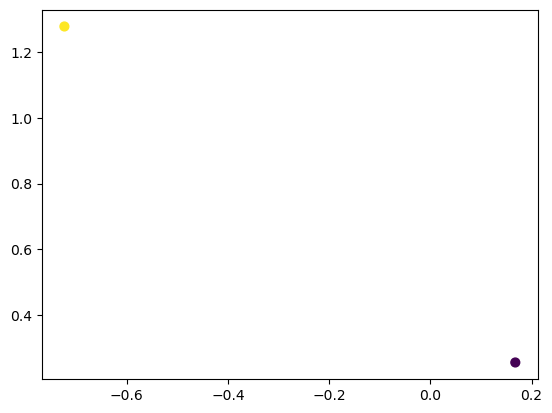

In [2]:
print(Y)

plt.scatter(X[0, :], X[1, :], c=Y, s=40);
plt.show()

In [3]:
X

array([[-0.72315139,  0.16798413],
       [ 1.27936128,  0.25449874]])

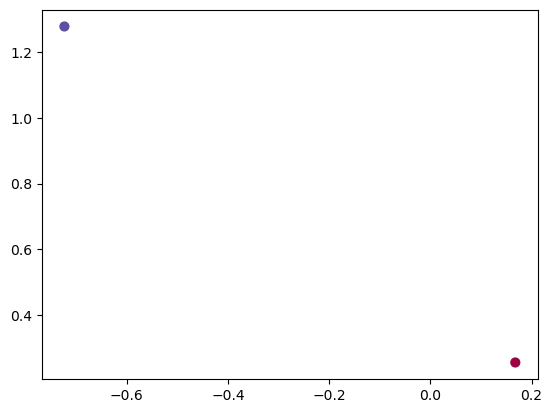

In [4]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

### Logistic Regression

In [5]:
# Learning rates and iterations
learning_rates = [0.0001, 0.01, 1.0]
iterations = 10
results = {}

# Network for each learning rate
for lr in learning_rates:
    print(f"\n--- Learning Rate: {lr} ---")
    results[lr] = []
    
    gaussian_quantiles = load_extra_datasets(samples)
    X, Y = gaussian_quantiles
    X, Y = X.T, Y.reshape(1, Y.shape[0])
    
    # Neural network architecture
    n_x = X.shape[0]  
    n_h = 4
    n_y = Y.shape[0]  
    
    import numpy as np
    
    # Weights and biases
    W1 = np.random.randn(n_h, n_x) * 0.01  # 4x2
    b1 = np.zeros(shape=(n_h, 1))  # 4x1
    W2 = np.random.randn(n_y, n_h) * 0.01  # 1x4
    b2 = np.zeros(shape=(n_y, 1))  # 1x1
    
    print("Initial b2:", b2)
    
    # Original sigmoid function
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    # Initial b2 for the first comparison
    b2_old = b2.copy()
    
    # Run for the 10 iterations
    for i in range(iterations):
        # Forward Propagation
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        # Final output prediction
        A2 = sigmoid(Z2)  
        
        # Cost
        cost_function = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
        total_cost = -np.sum(cost_function) / samples
        
        # Backpropagation
        dZ2 = A2 - Y
        dW2 = (1 / samples) * np.dot(dZ2, A1.T)
        db2 = (1 / samples) * np.sum(dZ2, axis=1, keepdims=True)
        
        dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
        dW1 = (1 / samples) * np.dot(dZ1, X.T)
        db1 = (1 / samples) * np.sum(dZ1, axis=1, keepdims=True)
        
        # Updating parameters using gradient descent
        W1 = W1 - lr * dW1
        b1 = b1 - lr * db1
        W2 = W2 - lr * dW2
        b2 = b2 - lr * db2
        
        # Delta change
        delta_change = b2 - b2_old
        results[lr].append(delta_change.copy())
        
        # Updating b2 for next comparison
        b2_old = b2.copy()
        
        print(f"Iteration {i+1}, b2: {b2[0][0]}, delta change: {delta_change[0][0]}")
    
    print(f"Final b2 value: {b2}")
    print(f"Total delta change over {iterations} iterations: {sum([delta[0][0] for delta in results[lr]])}")



--- Learning Rate: 0.0001 ---
Initial b2: [[0.]]
Iteration 1, b2: -2.1992967544071098e-09, delta change: -2.1992967544071098e-09
Iteration 2, b2: -4.3991003248256e-09, delta change: -2.1998035704184903e-09
Iteration 3, b2: -6.599410699320574e-09, delta change: -2.200310374494974e-09
Iteration 4, b2: -8.80022786594048e-09, delta change: -2.200817166619906e-09
Iteration 5, b2: -1.1001551812750421e-08, delta change: -2.2013239468099408e-09
Iteration 6, b2: -1.32033825278155e-08, delta change: -2.2018307150650793e-09
Iteration 7, b2: -1.5405719999189716e-08, delta change: -2.202337471374216e-09
Iteration 8, b2: -1.760856421493262e-08, delta change: -2.2028442157429046e-09
Iteration 9, b2: -1.9811915163103766e-08, delta change: -2.203350948171145e-09
Iteration 10, b2: -2.2015772831768256e-08, delta change: -2.2038576686644896e-09
Final b2 value: [[-2.20157728e-08]]
Total delta change over 10 iterations: -2.2015772831768256e-08

--- Learning Rate: 0.01 ---
Initial b2: [[0.]]
Iteration 1, b2